In [30]:
#import data
datastore_path = "https://automlsamplenotebookdata.blob.core.windows.net/automl-sample-notebook-data/bankmarketing_train.csv"
from azureml.data.dataset_factory import TabularDatasetFactory
raw_data = TabularDatasetFactory.from_delimited_files(path=datastore_path)
original_ds = raw_data.to_pandas_dataframe()
print(original_ds.shape)

(32950, 21)


In [7]:
#Checking for null values
original_ds.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
#Investigate all the elements within each column
import numpy as np

for column in original_ds:
    unique_values = np.unique(original_ds[column])
    nr_values = len(unique_values)
    if nr_values < 10:
        print("The number of values for column {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for column {} is: {}".format(column, nr_values))

The number of values for column age is: 77
The number of values for column job is: 12
The number of values for column marital is: 4 -- ['divorced' 'married' 'single' 'unknown']
The number of values for column education is: 8 -- ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
The number of values for column default is: 3 -- ['no' 'unknown' 'yes']
The number of values for column housing is: 3 -- ['no' 'unknown' 'yes']
The number of values for column loan is: 3 -- ['no' 'unknown' 'yes']
The number of values for column contact is: 2 -- ['cellular' 'telephone']
The number of values for column month is: 10
The number of values for column day_of_week is: 5 -- ['fri' 'mon' 'thu' 'tue' 'wed']
The number of values for column duration is: 1463
The number of values for column campaign is: 39
The number of values for column pdays is: 26
The number of values for column previous is: 8 -- [0 1 2 3 4 5 6 7]
The number of values for colu

In [26]:
#List columns in the original dataest
original_ds.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

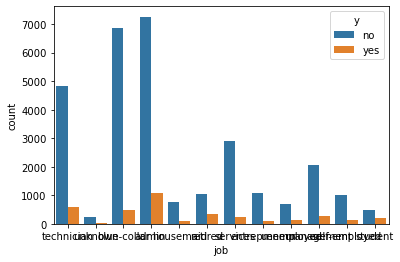

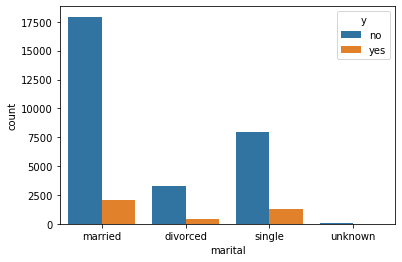

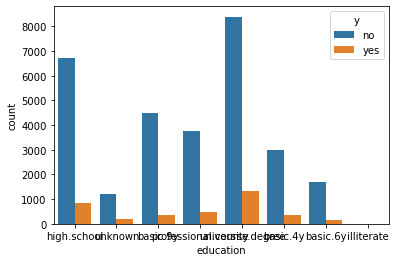

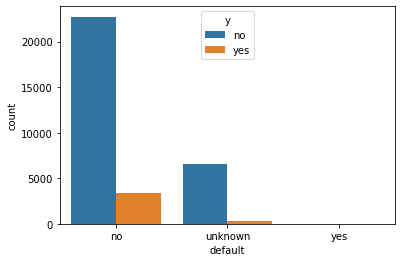

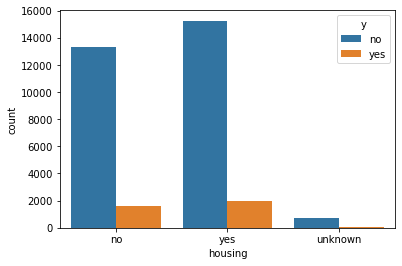

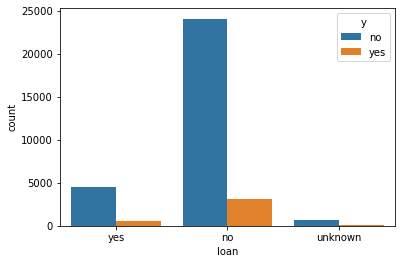

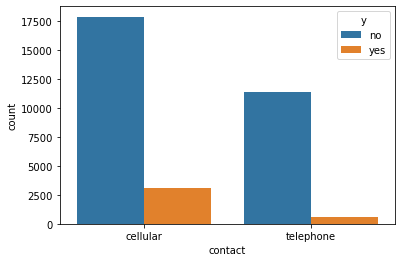

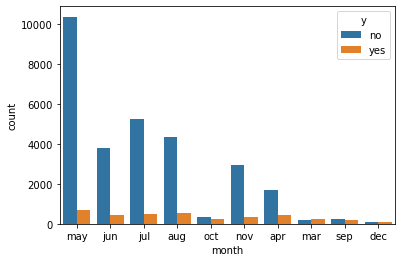

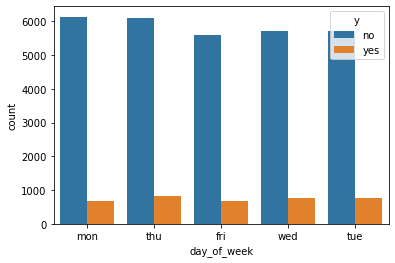

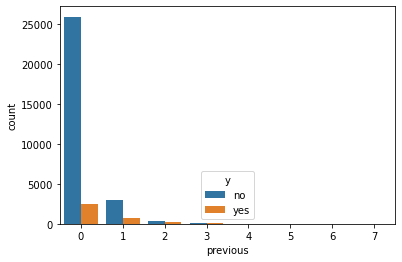

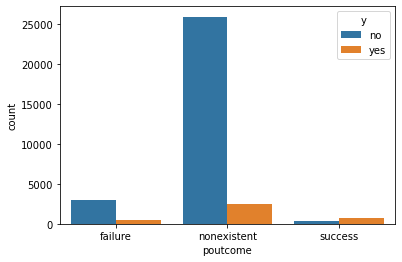

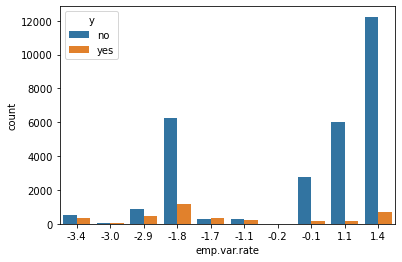

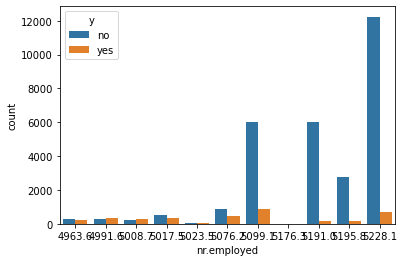

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

columns = [ 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week',
       'previous', 'poutcome', 'emp.var.rate', 'nr.employed']

for c in columns:
    sns.countplot(x=c, data=original_ds, hue="y")
    plt.show()

In [31]:
#define clean function
import pandas as pd

def clean_data(data):
    # Dict for cleaning data
    months = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
    weekdays = {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7}

    # Clean and one hot encode data
    x_df = data.dropna()
    jobs = pd.get_dummies(x_df.job, prefix="job")
    x_df.drop("job", inplace=True, axis=1)
    x_df = x_df.join(jobs)
    x_df["marital"] = x_df.marital.apply(lambda s: 1 if s == "married" else 0)
    x_df["default"] = x_df.default.apply(lambda s: 1 if s == "yes" else 0)
    x_df["housing"] = x_df.housing.apply(lambda s: 1 if s == "yes" else 0)
    x_df["loan"] = x_df.loan.apply(lambda s: 1 if s == "yes" else 0)
    contact = pd.get_dummies(x_df.contact, prefix="contact")
    x_df.drop("contact", inplace=True, axis=1)
    x_df = x_df.join(contact)
    education = pd.get_dummies(x_df.education, prefix="education")
    x_df.drop("education", inplace=True, axis=1)
    x_df = x_df.join(education)
    x_df["month"] = x_df.month.map(months)
    x_df["day_of_week"] = x_df.day_of_week.map(weekdays)
    x_df["poutcome"] = x_df.poutcome.apply(lambda s: 1 if s == "success" else 0)

    # remove duration column
    x_df = x_df.drop("duration", axis=1)

    y_df = x_df.pop("y").apply(lambda s: 1 if s == "yes" else 0)
    
    return x_df, y_df

In [34]:
x, y = clean_data(original_ds)
print(x.shape)
print(y.shape)

(32950, 38)
(32950,)


In [35]:
x.head()

,age,marital,default,housing,loan,month,day_of_week,campaign,pdays,previous,...,contact_cellular,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,57,1,0,0,1,5,1,1,999,1,...,1,0,0,0,0,1,0,0,0,0
1,55,1,0,1,0,5,4,2,999,0,...,0,1,0,0,0,0,0,0,0,1
2,33,1,0,0,0,5,5,1,999,1,...,1,0,0,0,1,0,0,0,0,0
3,36,1,0,0,0,6,5,4,999,0,...,0,1,0,0,0,1,0,0,0,0
4,27,1,0,1,0,7,5,2,999,0,...,1,0,0,0,0,1,0,0,0,0


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


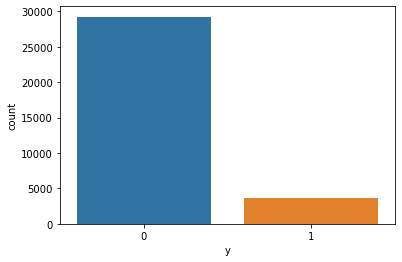

In [36]:
sns.countplot(y)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26360, 38)
(6590, 38)
(26360,)
(6590,)


In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=5448.578094934016, max_iter=500).fit(x_train, y_train)

In [55]:
from sklearn.metrics import classification_report

accuracy = model.score(x_test, y_test)
print("The model accuracy is :", accuracy)

y_predict = model.predict(x_train)
print(classification_report(y_train, y_predict))

The model accuracy is : 0.9019726858877086
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     23398
           1       0.68      0.22      0.33      2962

    accuracy                           0.90     26360
   macro avg       0.79      0.60      0.64     26360
weighted avg       0.88      0.90      0.88     26360



In [49]:
# Show coefficients of the columns in the decision function
model.coef_

array([[ 0.00487148, -0.11152094, -0.0004593 ,  0.01092936, -0.01950479,
        -0.02531656,  0.01692861, -0.05612362, -0.00181331, -0.36668397,
         0.04601336, -0.14285215,  0.40540441,  0.03847671, -0.08444004,
        -0.00710256,  0.10090331, -0.20496653, -0.00179184,  0.00397867,
        -0.0205491 ,  0.11280439,  0.00356411, -0.08623886,  0.07049034,
         0.03255319,  0.0124295 , -0.02082789,  0.3475321 , -0.34518281,
        -0.04639206, -0.03399934, -0.1246785 , -0.01852737,  0.00633467,
         0.00407557,  0.18266039,  0.03287593]])